<a href="https://colab.research.google.com/github/fressbish/Koptev-Dmitry/blob/main/Lab3_KoptevDA_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа
В этой лабораторной работе вам предлагается решить задачу бинарной классификации на наборе данных Titanic с помощью фреймворка глубокого обучения TensorFlow.

Давайте убедимся, что необходимые нам для этой работы библиотеки уже установлены.

In [1]:
!pip install numpy tensorflow_datasets tensorflow

# Описание набора данных
В данной работе целью исследования будет набор данных Titanic. Данный набор содержит информацию о различных пассажирах корабля "Титаник", затонувшего в ночь на 15-е апреля 1912 года. Некоторое количество пассажиров спаслось, чему способствовало множество различных факторов, включая их пол, возраст, на какой палубе находилась их кабина, социальный статус, и т.д. Мы предлагаем вам натренировать нейронную сеть для бинарной классификации, способную предсказывать вероятность спасения человека на основе его данных.  

Набор данных состоит из различных признаков, описывающих информацию о пассажирах. Каждая строка таблицы - отдельный пассажир, вся информация о нем содержится в его строке. В столбце survived находится бинарная метка (0 или 1), означающая, спасся ли человек с корабля (1) или нет (0). Вашей задачей является изучить набор данных, корректно определить решаемую задачу, а затем построить модель, которая будет способна предсказывать вероятность спасения и посчитать F1-метрику на тестовом наборе данных.

Для загрузки набора данных мы снова будем использовать библиотеку tensorflow_datasets.

Импортируем данную библиотеку, а затем с помощью нее загрузим набор данных "titanic". В процессе загрузки сразу разделим его на тренировочную, валидационную и тестовую выборку.

In [2]:
import tensorflow_datasets as tfds
ds_train_tf, ds_validation_tf, ds_test_tf = tfds.load(
    name='titanic',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    as_supervised=True
)

По умолчанию библиотека загружает данные в формате TensorFlow Dataset. Этот формат позволяет оперировать данными на жестком диске без предварительной загрузки их в память, что позволят обучать модели на данных, превышающих размер оперативной памяти вашего устройства.

Набор данных Titanic является достаточно небольшим набором и мы уверены, что оперативной памяти вашего устройства хватит для хранения его целиком, поэтому это в данный момент не играет решающей роли. Однако, вам будет полезно научиться работать с ним.

Примеры использования и различных функций этого формата данных вы можете найти в документации Keras.

Давайте выведем первую строку тренировочного набора данных для ознакомления.

In [3]:
for x, y in ds_train_tf.take(1):
    print(f"{x=}")
    print(f"{y=}")

x={'age': <tf.Tensor: shape=(), dtype=float32, numpy=30.0>, 'boat': <tf.Tensor: shape=(), dtype=string, numpy=b'Unknown'>, 'body': <tf.Tensor: shape=(), dtype=int32, numpy=-1>, 'cabin': <tf.Tensor: shape=(), dtype=string, numpy=b'Unknown'>, 'embarked': <tf.Tensor: shape=(), dtype=int64, numpy=2>, 'fare': <tf.Tensor: shape=(), dtype=float32, numpy=13.0>, 'home.dest': <tf.Tensor: shape=(), dtype=string, numpy=b'Sarnia, ON'>, 'name': <tf.Tensor: shape=(), dtype=string, numpy=b'McCrie, Mr. James Matthew'>, 'parch': <tf.Tensor: shape=(), dtype=int32, numpy=0>, 'pclass': <tf.Tensor: shape=(), dtype=int64, numpy=1>, 'sex': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'sibsp': <tf.Tensor: shape=(), dtype=int32, numpy=0>, 'ticket': <tf.Tensor: shape=(), dtype=string, numpy=b'233478'>}
y=<tf.Tensor: shape=(), dtype=int64, numpy=0>


Как можно заметить, формат текущего датасета представляет собой кортеж из двух элементов - признаков и метки класса. Признаки организованы как словарь с ключами (названиями признаков) и значениями признаков. Данный формат можно использовать напрямую для метода model.fit, однако признаки, несомненно, требуют предобработки.

Итак, к настоящему моменту мы загрузили набор данных, разделили его на тренировочную, валидационную и тестовую выборку и готовы приступить к решению задачи. Вашим финальным заданием является получение максимального значения F1-метрики на тестовом наборе данных, используя все возможности по изучению и визуализации данных, предобработке данных, а также нейронную сеть, выполненную с помощью фреймворка TensorFlow (и его части - Keras).  

Для того, чтобы напомнить процесс подготовки данных и обучения модели, мы поместили несколько ячеек с комментариями ниже в предполагаемом порядке. Однако, вы можете использовать любой удобный вам процесс.  

В процессе исследования и тренировки запрещено использовать данных из ds_test кроме как для финальной оценки F1 метрики. Данная лабораторная работа служит не для проверки ваших навыков, а для того, чтобы вы могли оттачить навыки обучения НС и работы с соответствующими библиотеками. Мы просим вас попытаться решить задачу самостоятельно, не используя доступную информацию из ds_test набора и не пытаясь подогнать модель под идеальную работу с конкретно данным набором, а также просим не использовать внешние источники данных и информацию из соответствующих соревнований на платформе Kaggle.

Вы можете найти для себя полезным пройти снова ноутбук с описанием работы фреймворка Keras и информацией о том, как его использовать. Также по данному фреймворку доступны многочисленные туториалы и примеры на его сайте. Напомним вам, что задача представляет собой бинарную классификацию, поэтому вам необходимо выбрать правильное количество нейронов для последнего слоя и функцию активации.

Успехов!

### Предобработка данных

In [4]:
import pandas as pd
import numpy as np

- Pclass Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- survival Survival (0 = No; 1 = Yes)
- name Name
- sex Sex
- age Age
- sibsp Number of Siblings/Spouses Aboard
- parch Number of Parents/Children Aboard
- ticket Ticket Number
- fare Passenger Fare (British pound)
- cabin Cabin
- embarked Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
- boat Lifeboat
- body Body Identification Number
- home.dest Home/Destination


In [5]:
# ds_train_tf, ds_validation_tf, ds_test_tf

def preprocessing(data):

  x, y = zip(*data.as_numpy_iterator())
  X = pd.DataFrame(x)

  # чистим строковые значения
  X['boat'] = X['boat'].str.decode("utf-8")
  X['cabin'] = X['cabin'].str.decode("utf-8")
  X['home.dest'] = X['home.dest'].str.decode("utf-8")
  X['name'] = X['name'].str.decode("utf-8")
  X['ticket'] = X['ticket'].str.decode("utf-8")

  Y = pd.DataFrame(y)
  Y.columns = ['survived']

  df = X
  df['survived'] = Y.values

  # заполнение пропусков значениями nan (https://www.tensorflow.org/datasets/catalog/titanic)
  df.replace(-1, np.nan, inplace=True)
  df.replace('Unknown', np.nan, inplace=True)
  df.replace('?', np.nan, inplace=True)
  # df.dropna(inplace=True)

  X = df.drop('survived', axis=1)
  Y = df['survived']

  return X, Y

In [6]:
x_train, y_train = preprocessing(ds_train_tf)
x_val, y_val = preprocessing(ds_validation_tf)
x_test, y_test = preprocessing(ds_test_tf)

In [7]:
x_train.head()

,age,boat,body,cabin,embarked,fare,home.dest,name,parch,pclass,sex,sibsp,ticket
0,30.0,NaN,NaN,NaN,2,13.0000,"Sarnia, ON","McCrie, Mr. James Matthew",0,1,0,0,233478
1,37.0,NaN,98.0,NaN,2,7.9250,"Ruotsinphytaa, Finland New York, NY","Gustafsson, Mr. Anders Vilhelm",0,2,0,2,3101276
2,28.0,9,NaN,NaN,2,13.0000,Spain,"Reynaldo, Ms. Encarnacion",0,1,1,0,230434
3,18.0,NaN,NaN,NaN,2,73.5000,"Lyndhurst, England","Davies, Mr. Charles Henry",0,1,0,0,S.O.C. 14879
4,NaN,NaN,NaN,NaN,0,7.8958,NaN,"Gheorgheff, Mr. Stanio",0,2,0,0,349254


In [8]:
x_train.isna().sum(), x_train.shape

(age          215
 boat         666
 body         943
 cabin        813
 embarked       0
 fare           1
 home.dest    466
 name           0
 parch          0
 pclass         0
 sex            0
 sibsp          0
 ticket         0
 dtype: int64,
 (1047, 13))

In [9]:
pd.isna(x_train['boat'])==False

0       False
1       False
2        True
3       False
4       False
        ...  
1042    False
1043     True
1044     True
1045    False
1046     True
Name: boat, Length: 1047, dtype: bool

In [10]:
def fill_missings(X): # заполнение пропусков
  X['age'].fillna(X['age'].median(), inplace=True)
  X.drop('body', axis=1, inplace=True)
  X.drop('cabin', axis=1, inplace=True)
  X.drop('home.dest', axis=1, inplace=True)
  X['fare'].fillna(X['fare'].median(), inplace=True)
  X['status'] = X['name'].str.extract(' ([A-Za-z]+)\.', expand=False)
  X.drop('name', axis=1, inplace=True)
  X = pd.concat([X, pd.get_dummies(X.status, dtype='int')], axis=1)
  X.drop('status', axis=1, inplace=True)
  X.drop('ticket', axis=1, inplace=True)
  X.loc[pd.isna(X['boat'])==False, 'boat'] = 1
  X.loc[pd.isna(X['boat']), 'boat'] = 0
  return X

x_train['data_type'] = 'train'
x_val['data_type'] = 'val'
x_test['data_type'] = 'test'
data = pd.concat([x_train, x_val, x_test])

data_filled = fill_missings(data)

x_train_filled = data_filled[data_filled.data_type=='train']
x_train_filled = x_train_filled.drop('data_type', axis=1)
x_val_filled = data_filled[data_filled.data_type=='val']
x_val_filled = x_val_filled.drop('data_type', axis=1)
x_test_filled = data_filled[data_filled.data_type=='test']
x_test_filled = x_test_filled.drop('data_type', axis=1)

In [11]:
x_train_filled

,age,boat,embarked,fare,parch,pclass,sex,sibsp,Capt,Col,...,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
0,30.0,0,2,13.0000,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,37.0,0,2,7.9250,0,2,0,2,0,0,...,0,0,0,0,0,1,0,0,0,0
2,28.0,1,2,13.0000,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,18.0,0,2,73.5000,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,28.0,0,0,7.8958,0,2,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1042,29.0,0,2,10.4625,1,2,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1043,32.0,1,2,13.0000,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1044,28.0,1,2,16.1000,0,2,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1045,4.0,0,2,31.2750,2,2,0,4,0,0,...,0,1,0,0,0,0,0,0,0,0


In [12]:
x_train_filled.isna().sum()

age         0
boat        0
embarked    0
fare        0
parch       0
pclass      0
sex         0
sibsp       0
Capt        0
Col         0
Countess    0
Don         0
Dona        0
Dr          0
Jonkheer    0
Lady        0
Major       0
Master      0
Miss        0
Mlle        0
Mme         0
Mr          0
Mrs         0
Ms          0
Rev         0
Sir         0
dtype: int64

In [13]:
x_train_filled.head()

,age,boat,embarked,fare,parch,pclass,sex,sibsp,Capt,Col,...,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
0,30.0,0,2,13.0000,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,37.0,0,2,7.9250,0,2,0,2,0,0,...,0,0,0,0,0,1,0,0,0,0
2,28.0,1,2,13.0000,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,18.0,0,2,73.5000,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,28.0,0,0,7.8958,0,2,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


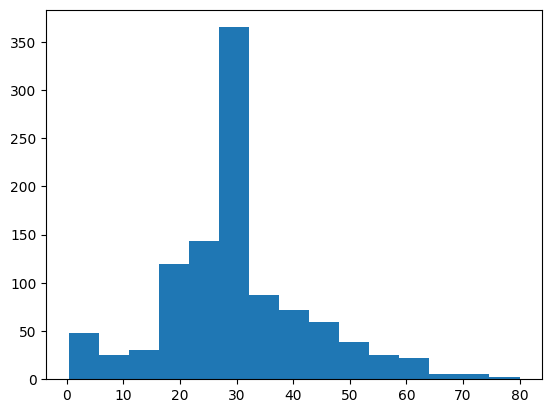

In [14]:
import matplotlib.pyplot as plt
plt.hist(x_train_filled.age, bins=15)
plt.show()

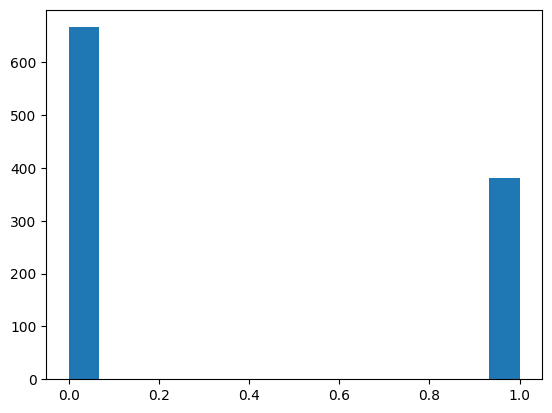

In [15]:
plt.hist(x_train_filled.boat, bins=15)
plt.show()

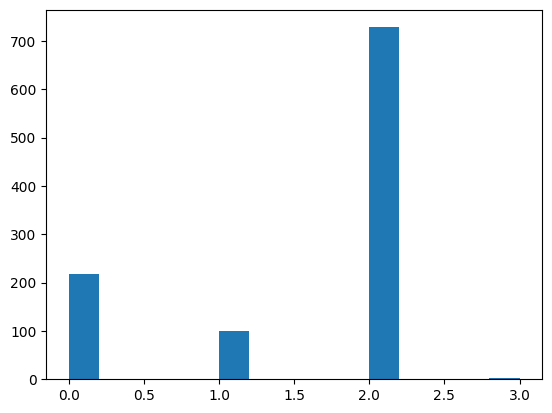

In [16]:
plt.hist(x_train_filled.embarked, bins=15)
plt.show()

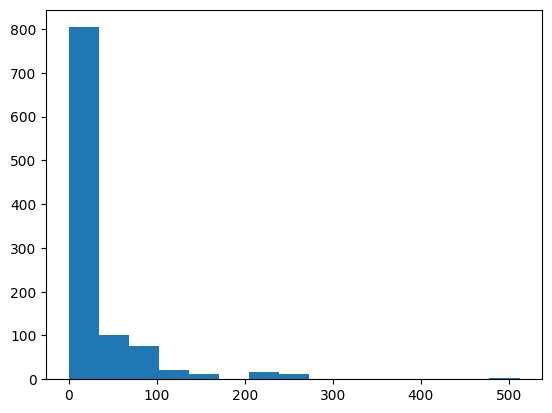

In [17]:
plt.hist(x_train_filled.fare, bins=15)
plt.show()

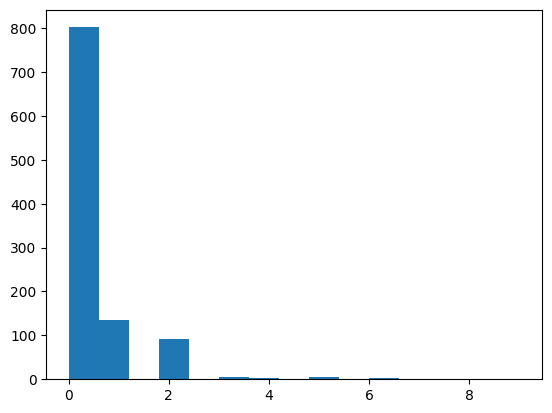

In [18]:
plt.hist(x_train_filled.parch, bins=15)
plt.show()

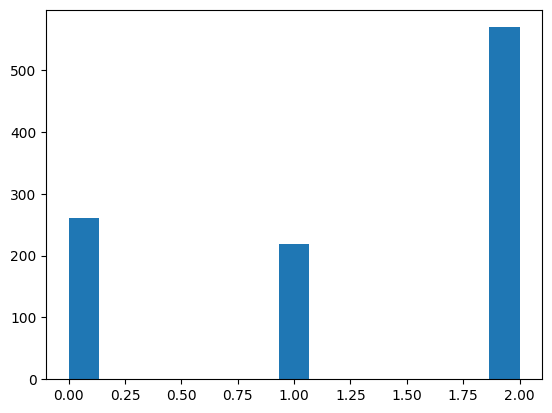

In [19]:
plt.hist(x_train_filled.pclass, bins=15)
plt.show()

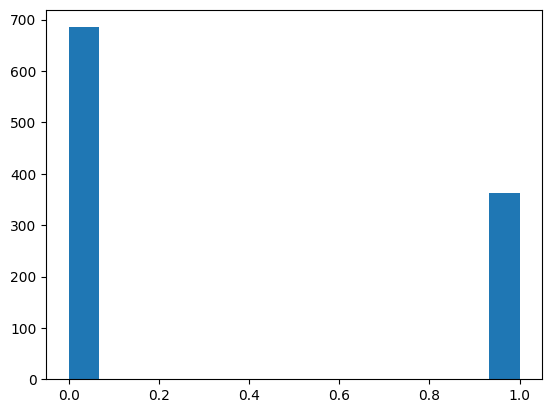

In [20]:
plt.hist(x_train_filled.sex, bins=15)
plt.show()

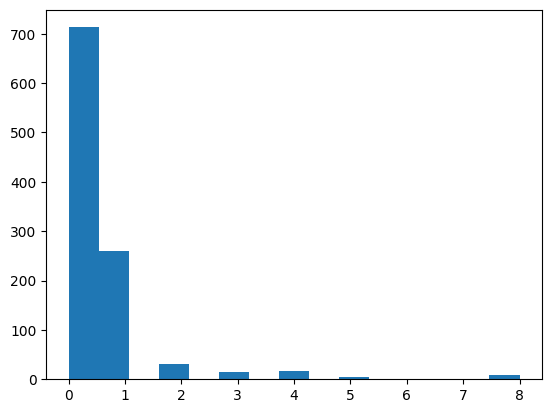

In [21]:
plt.hist(x_train_filled.sibsp, bins=15)
plt.show()

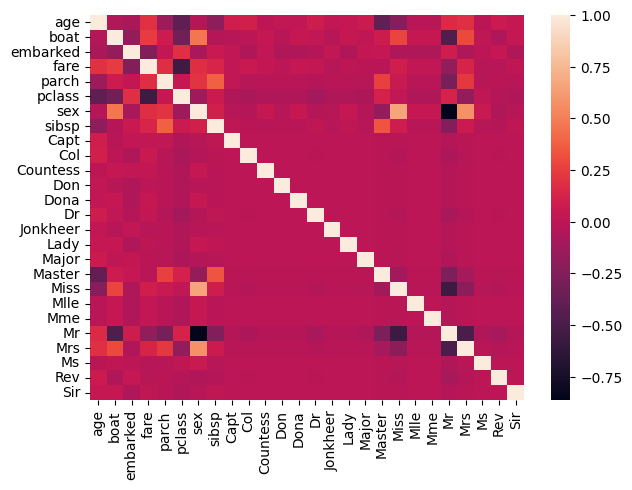

In [22]:
import seaborn as sns
plt.figure(figsize=(7,5))
sns.heatmap(x_train_filled.corr())
plt.show()

## Нормализация данных

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train_filled)
x_val_scaled = sc.transform(x_val_filled)
x_test_scaled = sc.transform(x_test_filled)

In [24]:
x_train_scaled

array([[ 0.02592328, -0.75635446,  0.62156744, ..., -0.04374786,
        -0.08204127, -0.03091962],
       [ 0.56669667, -0.75635446,  0.62156744, ..., -0.04374786,
        -0.08204127, -0.03091962],
       [-0.12858341,  1.32213142,  0.62156744, ..., 22.8582589 ,
        -0.08204127, -0.03091962],
       ...,
       [-0.12858341,  1.32213142,  0.62156744, ..., -0.04374786,
        -0.08204127, -0.03091962],
       [-1.98266361, -0.75635446,  0.62156744, ..., -0.04374786,
        -0.08204127, -0.03091962],
       [-1.05562351,  1.32213142,  0.62156744, ..., -0.04374786,
        -0.08204127, -0.03091962]])

## Обучение модели

In [25]:
from tensorflow import keras
from keras import layers
from keras.metrics import AUC, F1Score

def create_model(hp):
    model = keras.Sequential()
    # слои
    for i in range(hp.Int("num_layers", 1, 2, 3)):
      model.add(
        layers.Dense(
          # кол-во нейронов
          units=hp.Choice(f"units_{i}", [4, 8, 16]),
          activation=hp.Choice("activation", ["relu", "tanh", "sigmoid"]),
          bias_initializer='ones'
        )
      )

    model.add(layers.Dense(1, activation='sigmoid'))
    learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
    model.compile(
      optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
      loss="binary_crossentropy",
      metrics=[AUC()],
    )

    return model

In [26]:
from tensorflow.keras.callbacks import EarlyStopping
stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

In [27]:
# pip install keras-tuner --upgrade

In [28]:
import keras_tuner
tuner = keras_tuner.BayesianOptimization(
    create_model,
    objective=keras_tuner.Objective("val_loss", direction="min")
)
tuner.search(
      x_train_scaled,
      y_train,
      epochs=300,
      validation_data=(x_val_scaled, y_val),
      shuffle=True,
      batch_size=50,
      verbose=1,
      callbacks=[stop])

Trial 10 Complete [00h 00m 12s]
val_loss: 0.05642842501401901

Best val_loss So Far: 0.04384201765060425
Total elapsed time: 00h 06m 06s


In [29]:
best_params = tuner.get_best_hyperparameters(num_trials=1)[0].values
best_params

{'num_layers': 1,
 'units_0': 16,
 'activation': 'relu',
 'lr': 0.004928436556323886}

In [35]:
model = keras.Sequential()
model.add(layers.Dense(units=16,
                        activation='relu',
                        bias_initializer='ones')
)
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=keras.optimizers.Adam(learning_rate=best_params['lr']),
              loss="binary_crossentropy", metrics=[AUC(name='auc')])

In [36]:
y_val_pred = model.predict(x_val_scaled)
y_train_pred = model.predict(x_train_scaled)
y_test_pred = model.predict(x_test_scaled)

5/5 [==============================] - 0s 3ms/step


In [37]:
from sklearn.metrics import precision_recall_curve, f1_score

precision, recall, thresholds = precision_recall_curve(y_train, y_train_pred)
f1_scores = 2 * recall * precision / (recall + precision+10**-10)

# оптимальный порог
opt_threshold_idx = np.argmax(f1_scores)
opt_threshold = thresholds[opt_threshold_idx]
opt_threshold

0.41896078

In [38]:
y_train_pred_ = (y_train_pred >= opt_threshold).astype(int)
y_val_pred_ = (y_val_pred >= opt_threshold).astype(int)
y_test_pred_ = (y_test_pred >= opt_threshold).astype(int)

In [39]:
# качество модели
f1_score(y_train, y_train_pred_), f1_score(y_val, y_val_pred_), f1_score(y_test, y_test_pred_)

(0.9047619047619048, 0.9516129032258065, 0.946236559139785)

На тренировочном, валидационном и тестовом наборах f1-score почти совпадает. На тестовых данных качество модели ~0.95. Модель хорошо натренирована и не переобучена.